In [ ]:
# 1: Uvoz biblioteka i učitavanje podataka

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

# Stilizacija grafikona
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Ucitavanje podataka o potrosnji
data_path = 'Datasets/PERSONAL HOUSEHOLD CONSUMPTION, MONTHLY AVERAGE.csv'
data = pd.read_csv(data_path, sep=';')

# Ucitavanje podataka o platama
salary_data_path = 'Datasets/plate-godisnji-prosek.xlsx'
salary_data = pd.read_excel(salary_data_path)

# Izracunavanje procesne mesecne zarade
salary_data['Prosecna mesecna zarada'] = salary_data['Prosecna godisnja zarada'] / 12


In [ ]:
# Provera tipova podataka
data_types = data.dtypes
print(data_types)

In [ ]:
# Provera dimenzije podataka
np.shape(data)

In [ ]:

# Provera nedostajućih vrednosti
missing_values = data.isnull().sum()

In [ ]:
# Koristimo Pandas DataFrame za bolju strukturu podataka
df = pd.DataFrame(data)
df.head()

In [ ]:
# Osnovne statistike podataka - Opis
df.describe()

In [ ]:
# Osnovne statistike podataka - Opis
df.info()

In [ ]:
# Provera duplikata
df.duplicated().sum()

In [ ]:
# Provera vrednosti (koliko imamo podataka)
df.nTer.value_counts()

In [ ]:
# Provera vrednosti (koliko imamo podataka)
df.nCOICOP.value_counts()

In [85]:
# ------- Vizualizacija podataka ------- #

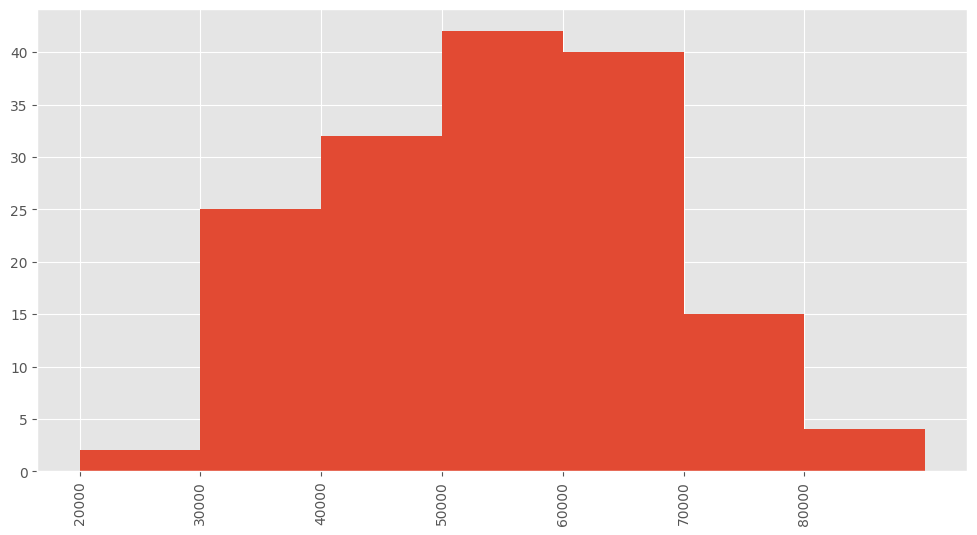

<Figure size 1400x800 with 0 Axes>

In [90]:
# Prikaz zastupljenosti potrosnje u vrednosti RSD
hist_vrednost = df[(df['nVrPod'] == 'RSD') & (data['nCOICOP'] == 'Total') & (data['nTipNaselja'] != 'Total')]
# Definisanje opsega za bins
bins = [20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
# Crtanje histograma
plt.hist(hist_vrednost.vrednost,bins=bins)
# Podesavanje x-ose
plt.xticks(range(20000,90000,10000), rotation=90)
# Podesavanje velicine grafa
plt.figure(figsize=(14,8))
# Prikazivanje grafikona
plt.show()

In [ ]:
# Priprema podataka za potrošnju po godinama
data_total_rsd = data[(data['nCOICOP'] == 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Priprema podataka za potrošnju po tipu naselja
data_by_settlement_type = data[(data['nTipNaselja'] != 'Total') & (data['nCOICOP'] == 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Spajanje podataka o potrošnji i zaradi
combined_data = data_total_rsd.merge(salary_data, left_on='god', right_on='Godina', how='left')


# Vizualizacija ukupne potrošnje, prosečnih mesečnih zarada i potrošnje po tipu naselja
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', data=combined_data, marker='o', label='Ukupna potrošnja (RSD)', color='blue')
sns.lineplot(x='god', y='Prosecna mesecna zarada', data=combined_data, marker='o', color='red', label='Prosečna mesečna zarada')
sns.lineplot(x='god', y='vrednost', hue='nTipNaselja', data=data_by_settlement_type, marker='o', palette='deep')

# Formatiranje grafikona
plt.title('Potrošnja i Prosečna mesečna zarada u Republici Srbiji po godinama i tipu naselja')
plt.xlabel('Godina')
plt.ylabel('Vrednost / Zarada')
plt.xticks(combined_data['god'].unique())
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filtriranje podataka za sve kategorije osim 'Total'
data_not_total_rsd = data[(data['nCOICOP'] != 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Sortiranje podataka po godinama i kategorijama za korektno prikazivanje u grafikonu
data_not_total_rsd_sorted = data_not_total_rsd.sort_values(by=['god', 'IDCOICOP'])

# Vizualizacija potrošnje po kategorijama
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', hue='nCOICOP', data=data_not_total_rsd_sorted, marker='o', palette='tab10')

# Formatiranje grafikona
plt.title('Potrošnja u Republici Srbiji po Kategorijama (osim Total) po godinama')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.xticks(data_not_total_rsd_sorted['god'].unique())
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Graf A - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_a, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf A')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Graf B - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_b, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf B')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Graf C - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_c, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Potrošnja po Kategorijama - Graf C')
plt.xlabel('Godina')
plt.ylabel('Vrednost')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
